# my frist project in Machine learning internship SYNC INTERN'S

## Week 1 >>Task 1>>Create a chat Bot

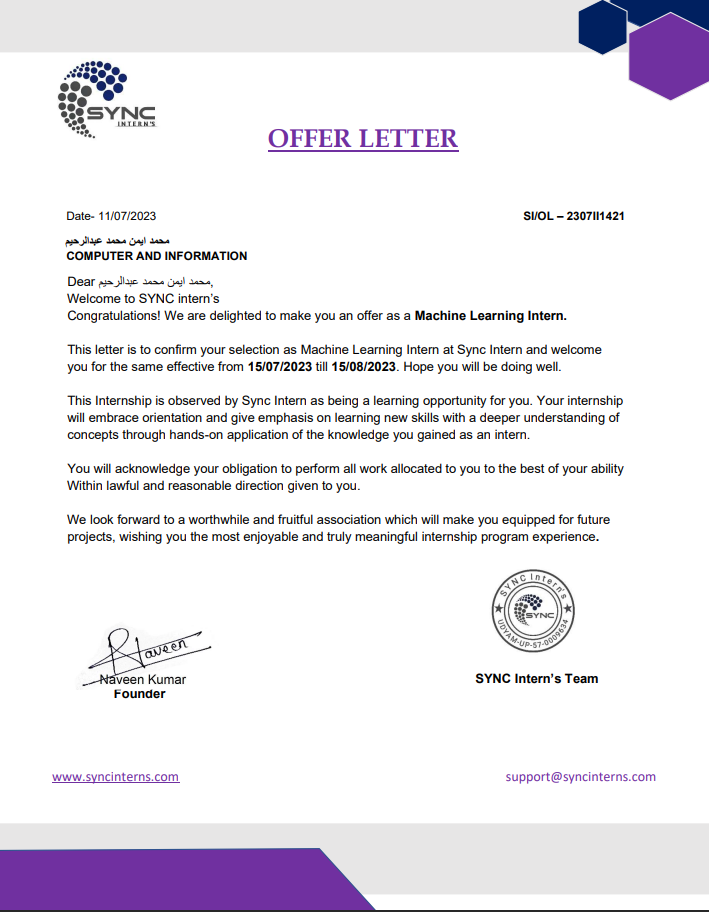

In [1]:
#import Libraries
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
dataset = {
  "What is machine learning?": "Machine learning is a subset of artificial intelligence that involves training algorithms to make predictions or decisions based on data.",
  "What is a neural network?": "A neural network is a type of machine learning algorithm that is inspired by the structure and function of the human brain.",
  "What is deep learning?": "Deep learning is a type of machine learning that uses multiple layers of interconnected neural networks to learn from data.",
  "What Are the Different Types of Machine Learning?":"Supervised Learning, Unsupervised Learning, Reinforcement Learning"
}

In [3]:
questions = list(dataset.keys())
answers = list(dataset.values())
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(questions)
question_sequences = tokenizer.texts_to_sequences(questions)
max_length = max([len(x) for x in question_sequences])
padded_questions = tf.keras.preprocessing.sequence.pad_sequences(question_sequences, maxlen=max_length, padding='post')


In [9]:
# Build the machine learning model
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(len(answers), activation='softmax')
])


#model compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 8, 32)             448       
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 2,820
Trainable params: 2,820
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model
model.fit(padded_questions, np.array(range(len(questions))), epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 468ms/step - loss: 1.3891 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 1.3851 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3821 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3793 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 1.3769 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 1.3749 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3728 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3706 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3685 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 1.3664 - accuracy: 1.0000


In [ ]:
# Define the chatbot interface
def chatbot():
    while True:
        user_input = input("Ask a question about machine learning : ")
        if user_input=='thanks':
            print ('your welcome')
            break
        else:
            user_sequence = tokenizer.texts_to_sequences([user_input])
            padded_user_sequence = tf.keras.preprocessing.sequence.pad_sequences(user_sequence, maxlen=max_length, padding='post')
            prediction = np.argmax(model.predict(padded_user_sequence))
            print(answers[prediction])

# Run the chatbot
chatbot()

Ask a question about machine learning : What Are the Different Types of Machine Learning?
1/1 [==============================] - 0s 90ms/step
Supervised Learning, Unsupervised Learning, Reinforcement Learning
Ask a question about machine learning : what is machine learning
1/1 [==============================] - 0s 17ms/step
Machine learning is a subset of artificial intelligence that involves training algorithms to make predictions or decisions based on data.
Ask a question about machine learning : what is deep learning?
1/1 [==============================] - 0s 21ms/step
Deep learning is a type of machine learning that uses multiple layers of interconnected neural networks to learn from data.
Ask a question about machine learning : What is a neural network?
1/1 [==============================] - 0s 19ms/step
A neural network is a type of machine learning algorithm that is inspired by the structure and function of the human brain.
Ask a question about machine learning : what is deep le